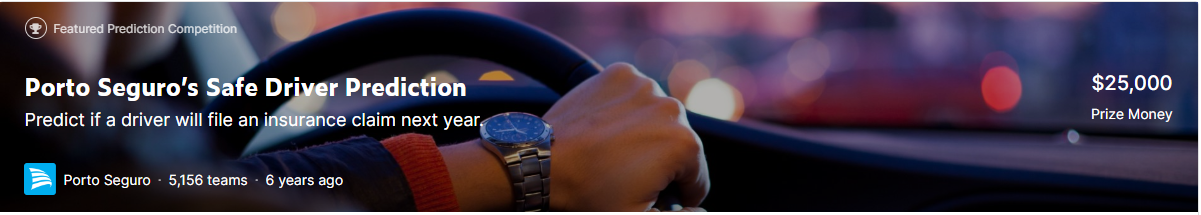

# Código de Escoragem Batch

In [1]:
# Bibliotecas necessárias para o projeto
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import pickle
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score

In [2]:
# Leitura dos dados a serem escorados
df_train_00 = pd.read_csv('train.csv')
df_train_00.shape

(595212, 59)

In [3]:
df_train_00.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
df_test_00 = pd.read_csv('test.csv')
df_test_00.shape

(892816, 58)

In [5]:
df_test_00.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [9]:
df_ss_00 = pd.read_csv('sample_submission.csv')
df_ss_00.shape

(892816, 2)

In [10]:
df_ss_00.head()

,id,target
0,0,0.0364
1,1,0.0364
2,2,0.0364
3,3,0.0364
4,4,0.0364


In [11]:
# Substituindo -1 por 'missing' em todo o dataframe
# Criando um novo dataframe baseado no original
df_train_01 = df_train_00.copy()
df_test_01 = df_test_00.copy()
df_ss_01 = df_ss_00.copy()

df_train_01.replace(-1, np.nan, inplace=True)
df_test_01.replace(-1, np.nan, inplace=True)
df_ss_01.replace(-1, np.nan, inplace=True)

In [12]:
# Carregar lista de variáveis que foram excluidas por execesso de nulos
with open('prd_drop_nullvars_a014.pkl', 'rb') as f:
    loaded_drop_null_feat = pickle.load(f)
loaded_drop_null_feat

['ps_car_03_cat']

In [13]:
# Retirando as variáveis excluídas por nulos
df_train_02 = df_train_01.drop(axis=1,columns=loaded_drop_null_feat)
df_test_02 = df_test_01.drop(axis=1,columns=loaded_drop_null_feat)

In [14]:
df_test_02.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1.0,8,1.0,0.0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2.0,5,1.0,0.0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1.0,3,0.0,0.0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1.0,6,0.0,0.0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1.0,7,0.0,0.0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [15]:
# Retirar ID e Target das tabelas (para escoragem não é necessário e em produção não teremos target)
df_train_02 = df_train_02.drop(axis=1, columns=['id','target'])
df_test_02 = df_test_02.drop(axis=1, columns=['id'])

df_test_02.shape,df_train_02.shape

((892816, 56), (595212, 56))

In [16]:
df_train_02.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2.0,5,1.0,0.0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1.0,7,0.0,0.0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4.0,9,1.0,0.0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1.0,2,0.0,0.0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2.0,0,1.0,0.0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [17]:
# Carregar as medias das variaveis da base de treino
with open('prd_fillna_a014.pkl', 'rb') as f:
  loaded_means = pickle.load(f)

def pod_custom_fillna_prod(df, means):
  df.replace(-1, np.nan, inplace=True)
  for col, mean_value in means.items():
      df[col].fillna(mean_value, inplace=True)

  categorical_cols = df.select_dtypes(include=['object']).columns
  df[categorical_cols] = df[categorical_cols].fillna('POD_VERIFICAR')

  return df

# Aplicar imputação de nulos na base de treino
df_train_02 = pod_custom_fillna_prod(df_train_02,loaded_means)

# Aplicar imputação de nulos na base de teste
df_test_02 = pod_custom_fillna_prod(df_test_02,loaded_means)


df_test_02.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,1.0,8,1.0,0.0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2.0,5,1.0,0.0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1.0,3,0.0,0.0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1.0,6,0.0,0.0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1.0,7,0.0,0.0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [18]:
# Carregar os encoders e a lista de colunas
with open('prd_labelenc_a014.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoders = loaded_data['encoders']
loaded_columns = loaded_data['columns']

# Aplicando para base de treino
for col in loaded_columns:
    if col in loaded_encoders:
        # Transforma a coluna usando o encoder carregado
        df_train_02[col] = loaded_encoders[col].transform(df_train_02[col])

# Aplicando para base de teste
for col in loaded_columns:
    if col in loaded_encoders:
        # Transforma a coluna usando o encoder carregado
        df_test_02[col] = loaded_encoders[col].transform(df_test_02[col])

In [19]:
# Carregar o encoder e a lista de colunas
with open('prd_onehotenc_a014.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoder = loaded_data['encoder']
loaded_columns = loaded_data['columns']

# Aplicando para base completa de treino
encoded_data_test = loaded_encoder.transform(df_train_02[loaded_columns])
encoded_cols_test = loaded_encoder.get_feature_names_out(loaded_columns)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_cols_test, index=df_train_02.index)
df_train_03 = pd.concat([df_train_02.drop(loaded_columns, axis=1), encoded_df_test], axis=1)

# Aplicando para base de teste
encoded_data_test = loaded_encoder.transform(df_test_02[loaded_columns])
encoded_cols_test = loaded_encoder.get_feature_names_out(loaded_columns)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_cols_test, index=df_test_02.index)
df_test_03 = pd.concat([df_test_02.drop(loaded_columns, axis=1), encoded_df_test], axis=1)

In [20]:
df_train_03.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2.0,5,1.0,0.0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1.0,7,0.0,0.0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4.0,9,1.0,0.0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1.0,2,0.0,0.0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2.0,0,1.0,0.0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [21]:
df_train_04 = df_train_03
df_test_04 = df_test_03

In [22]:
# Carregar o scaler
with open('prd_scaler_a014.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Aplicando na base de treino
df_train_04_scaled = loaded_scaler.transform(df_train_04)
df_train_05 = pd.DataFrame(df_train_04_scaled, columns=df_train_04.columns, index=df_train_04.index)

# Aplicando na base de teste
df_test_04s = loaded_scaler.transform(df_test_04)
df_test_05 = pd.DataFrame(df_test_04s, columns=df_test_04.columns, index=df_test_04.index)
df_test_05.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,-0.958565,-0.542601,1.325015,1.182765,-0.31183,-0.806035,1.701191,-0.442517,-0.477413,-0.019166,...,-1.902556,-0.367316,-1.105234,1.624615,-0.373426,0.770766,0.897048,-0.634586,-0.730772,2.350925
1,1.057180,0.966428,0.213366,1.182765,-0.31183,-0.806035,-0.587823,-0.442517,2.094620,-0.019166,...,-1.474199,-1.198881,0.075186,0.896386,-0.373426,-1.297410,0.897048,1.575831,-0.730772,2.350925
2,1.561116,-0.542601,-0.527733,-0.845588,-0.31183,-0.806035,-0.587823,-0.442517,2.094620,-0.019166,...,-0.617485,-1.198881,-0.515024,-1.288303,-0.373426,-1.297410,-1.114768,-0.634586,-0.730772,-0.425364
3,-0.958565,-0.542601,0.583916,-0.845588,-0.31183,1.240641,-0.587823,-0.442517,-0.477413,-0.019166,...,-0.189128,-0.367316,-1.695444,-0.924188,2.677904,-1.297410,0.897048,-0.634586,-0.730772,-0.425364
4,1.561116,-0.542601,0.954465,-0.845588,-0.31183,-0.806035,-0.587823,-0.442517,2.094620,-0.019166,...,-0.617485,-1.198881,-1.695444,-1.288303,-0.373426,0.770766,0.897048,-0.634586,-0.730772,2.350925


In [23]:
# Carregar lista de variáveis que passaram pelo Feature Sepection (utilizadas no treinamento do modelo)
with open('prd_list_features_a014.pkl', 'rb') as f:
    loaded_features = pickle.load(f)

loaded_features

['ps_ind_03',
 'ps_ind_15',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11_cat',
 'ps_car_13',
 'ps_car_14',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_13',
 'ps_calc_14']

In [24]:
abt_train = df_train_05[loaded_features]
abt_test = df_test_05[loaded_features]

In [25]:
abt_train.head()

,ps_ind_03,ps_ind_15,ps_reg_02,ps_reg_03,ps_car_11_cat,ps_car_13,ps_car_14,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_10,ps_calc_11,ps_calc_13,ps_calc_14
0,0.213366,1.043812,-0.592188,-0.563906,-1.522272,0.314372,-0.088932,0.522242,0.176951,-0.869620,-1.182005,1.524300,1.255606,0.168156
1,0.954465,-1.212218,-0.097692,-0.410365,-1.310157,-0.864661,0.317958,-0.522822,-1.216918,-0.521332,-0.493106,-1.045842,-1.105234,0.532271
2,1.695565,1.325816,-1.086683,0.000000,-0.067774,-0.763304,-0.623732,0.173887,0.873885,-1.217908,-0.493106,-0.617485,2.436026,-0.195959
3,-0.898283,0.197801,-0.592188,-1.002463,1.265515,-1.202386,-1.812583,0.522242,1.570820,-1.217908,-2.215353,-1.474199,0.665396,0.532271
4,-1.639382,0.479805,0.396803,-0.171515,0.598870,-1.100524,-0.218621,-0.174467,0.525418,-1.566196,1.229141,-1.045842,-1.105234,-1.652418


In [26]:
# Carregando modelo campeão

with open('best_model_lightgbm.pkl', 'rb') as f:
  loaded_model = pickle.load(f)

loaded_model

LGBMClassifier(lambda_l1=1.5, lambda_l2=1, max_depth=5, min_data_in_leaf=5,
               num_leaves=5, reg_alpha=0.1)

In [27]:
# Escorando base de treino

predprob = loaded_model.predict_proba(abt_train)
predict = loaded_model.predict(abt_train)
abt_train['score_1']=predprob[:,1]
abt_train['class']=predict

# Escorando base de teste

predprob = loaded_model.predict_proba(abt_test)
predict = loaded_model.predict(abt_test)
abt_test['score_1']=predprob[:,1]
abt_test['class']=predict

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1


C:\Users\BlueShift\AppData\Local\Temp\ipykernel_21648\1906252562.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt_train['score_1']=predprob[:,1]
C:\Users\BlueShift\AppData\Local\Temp\ipykernel_21648\1906252562.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt_train['class']=predict


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1


C:\Users\BlueShift\AppData\Local\Temp\ipykernel_21648\1906252562.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt_test['score_1']=predprob[:,1]
C:\Users\BlueShift\AppData\Local\Temp\ipykernel_21648\1906252562.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt_test['class']=predict


In [28]:
abt_train = abt_train.merge(df_train_00[['id','target']], left_index=True, right_index=True, how='inner')
abt_test = abt_test.merge(df_test_00[['id']], left_index=True, right_index=True, how='inner')

In [29]:
abt_train.head()

,ps_ind_03,ps_ind_15,ps_reg_02,ps_reg_03,ps_car_11_cat,ps_car_13,ps_car_14,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_10,ps_calc_11,ps_calc_13,ps_calc_14,score_1,class,id,target
0,0.213366,1.043812,-0.592188,-0.563906,-1.522272,0.314372,-0.088932,0.522242,0.176951,-0.869620,-1.182005,1.524300,1.255606,0.168156,0.468210,0,7,0
1,0.954465,-1.212218,-0.097692,-0.410365,-1.310157,-0.864661,0.317958,-0.522822,-1.216918,-0.521332,-0.493106,-1.045842,-1.105234,0.532271,0.455274,0,9,0
2,1.695565,1.325816,-1.086683,0.000000,-0.067774,-0.763304,-0.623732,0.173887,0.873885,-1.217908,-0.493106,-0.617485,2.436026,-0.195959,0.395016,0,13,0
3,-0.898283,0.197801,-0.592188,-1.002463,1.265515,-1.202386,-1.812583,0.522242,1.570820,-1.217908,-2.215353,-1.474199,0.665396,0.532271,0.362326,0,16,0
4,-1.639382,0.479805,0.396803,-0.171515,0.598870,-1.100524,-0.218621,-0.174467,0.525418,-1.566196,1.229141,-1.045842,-1.105234,-1.652418,0.515443,1,17,0


In [30]:
abt_test.head()

,ps_ind_03,ps_ind_15,ps_reg_02,ps_reg_03,ps_car_11_cat,ps_car_13,ps_car_14,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_10,ps_calc_11,ps_calc_13,ps_calc_14,score_1,class,id
0,1.325015,1.325816,-0.344940,-0.908497,0.083736,-0.638793,-0.513267,-1.219531,1.222352,0.523533,0.195793,-1.902556,-1.105234,1.624615,0.386625,0,0
1,0.213366,-0.648211,0.149555,-0.393463,1.235213,-0.920289,-0.372535,-0.174467,0.176951,-0.173043,-0.493106,-1.474199,0.075186,0.896386,0.466678,0,1
2,-0.527733,0.761809,-1.086683,0.069685,-1.007137,0.370281,0.540227,0.522242,0.525418,0.523533,1.229141,-0.617485,-0.515024,-1.288303,0.404028,0,2
3,0.583916,-0.930214,-0.592188,0.000000,-0.673815,-0.716454,0.152728,-1.219531,0.176951,0.175245,1.573590,-0.189128,-1.695444,-0.924188,0.416224,0,3
4,0.954465,-0.930214,-0.097692,-0.245034,1.174609,-0.000636,0.235733,1.567305,0.525418,1.220110,1.229141,-0.617485,-1.695444,-1.288303,0.535734,1,4


In [31]:
#### Preparando para envio para o Kaggle

abt_envio_kaggle = abt_test[['id','score_1']]
abt_envio_kaggle.rename(columns={'score_1':'target'},inplace=True)
abt_envio_kaggle.head()

C:\Users\BlueShift\AppData\Local\Temp\ipykernel_21648\1870814909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt_envio_kaggle.rename(columns={'score_1':'target'},inplace=True)


,id,target
0,0,0.386625
1,1,0.466678
2,2,0.404028
3,3,0.416224
4,4,0.535734


In [32]:
#### Salvando como aqrquivo csv

abt_envio_kaggle.to_csv('abt_scored_002.csv', index=False)